#### 10/08/2020 - Monday

### Data Manipulation with Pandas

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import pickle

In [6]:
with open('homeless_data.pkl', 'rb') as f:
    homelessness = pickle.load(f)

In [8]:
# Print the head of the homelessness data
print(homelessness.head())

               region       state  individuals  family_members  state_pop
0  East South Central     Alabama       2570.0           864.0    4887681
1             Pacific      Alaska       1434.0           582.0     735139
2            Mountain     Arizona       7259.0          2606.0    7158024
3  West South Central    Arkansas       2280.0           432.0    3009733
4             Pacific  California     109008.0         20964.0   39461588


In [9]:
# Print information about homelessness
print(homelessness.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
region            51 non-null object
state             51 non-null object
individuals       51 non-null float64
family_members    51 non-null float64
state_pop         51 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.0+ KB
None


In [10]:
# Print the shape of homelessness
print(homelessness.shape)

(51, 5)


In [11]:
# Print a description of homelessness
print(homelessness.describe())

         individuals  family_members     state_pop
count      51.000000       51.000000  5.100000e+01
mean     7225.784314     3504.882353  6.405637e+06
std     15991.025083     7805.411811  7.327258e+06
min       434.000000       75.000000  5.776010e+05
25%      1446.500000      592.000000  1.777414e+06
50%      3082.000000     1482.000000  4.461153e+06
75%      6781.500000     3196.000000  7.340946e+06
max    109008.000000    52070.000000  3.946159e+07


### Parts of a DataFrame
To better understand DataFrame objects, it's useful to know that they consist of three components, stored as attributes:

.values: A two-dimensional NumPy array of values.
.columns: An index of columns: the column names.
.index: An index for the rows: either row numbers or row names.

In [12]:
# Print the values of homelessness
print(homelessness.values)

[['East South Central' 'Alabama' 2570.0 864.0 4887681]
 ['Pacific' 'Alaska' 1434.0 582.0 735139]
 ['Mountain' 'Arizona' 7259.0 2606.0 7158024]
 ['West South Central' 'Arkansas' 2280.0 432.0 3009733]
 ['Pacific' 'California' 109008.0 20964.0 39461588]
 ['Mountain' 'Colorado' 7607.0 3250.0 5691287]
 ['New England' 'Connecticut' 2280.0 1696.0 3571520]
 ['South Atlantic' 'Delaware' 708.0 374.0 965479]
 ['South Atlantic' 'District of Columbia' 3770.0 3134.0 701547]
 ['South Atlantic' 'Florida' 21443.0 9587.0 21244317]
 ['South Atlantic' 'Georgia' 6943.0 2556.0 10511131]
 ['Pacific' 'Hawaii' 4131.0 2399.0 1420593]
 ['Mountain' 'Idaho' 1297.0 715.0 1750536]
 ['East North Central' 'Illinois' 6752.0 3891.0 12723071]
 ['East North Central' 'Indiana' 3776.0 1482.0 6695497]
 ['West North Central' 'Iowa' 1711.0 1038.0 3148618]
 ['West North Central' 'Kansas' 1443.0 773.0 2911359]
 ['East South Central' 'Kentucky' 2735.0 953.0 4461153]
 ['West South Central' 'Louisiana' 2540.0 519.0 4659690]
 ['New 

In [13]:
# Print the column index of homelessness
print(homelessness.columns)

Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')


In [14]:
# Print the row index of homelessness
print(homelessness.index)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
            50],
           dtype='int64')


### Sorting rows
Finding interesting bits of data in a DataFrame is often easier if you change the order of the rows. You can sort the rows by passing a column name to .sort_values().

In cases where rows have the same value (this is common if you sort on a categorical variable), you may wish to break the ties by sorting on another column. You can sort on multiple columns in this way by passing a list of column names.

In [15]:
# Sort homelessness by individual
homelessness_ind = homelessness.sort_values('individuals', ascending=True)

# Print the top few rows
print(homelessness_ind.head())

                region         state  individuals  family_members  state_pop
50            Mountain       Wyoming        434.0           205.0     577601
34  West North Central  North Dakota        467.0            75.0     758080
7       South Atlantic      Delaware        708.0           374.0     965479
39         New England  Rhode Island        747.0           354.0    1058287
45         New England       Vermont        780.0           511.0     624358


In [16]:
# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values('family_members', ascending=False)

# Print the top few rows
print(homelessness_fam.head())

                region          state  individuals  family_members  state_pop
32        Mid-Atlantic       New York      39827.0         52070.0   19530351
4              Pacific     California     109008.0         20964.0   39461588
21         New England  Massachusetts       6811.0         13257.0    6882635
9       South Atlantic        Florida      21443.0          9587.0   21244317
43  West South Central          Texas      19199.0          6111.0   28628666


In [17]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(['region', 'family_members'], 
                                                ascending=[True, False])

# Print the top few rows
print(homelessness_reg_fam.head())

                region      state  individuals  family_members  state_pop
13  East North Central   Illinois       6752.0          3891.0   12723071
35  East North Central       Ohio       6929.0          3320.0   11676341
22  East North Central   Michigan       5209.0          3142.0    9984072
49  East North Central  Wisconsin       2740.0          2167.0    5807406
14  East North Central    Indiana       3776.0          1482.0    6695497


### Subsetting columns
When working with data, you may not need all of the variables in your dataset. Square-brackets ([]) can be used to select only the columns that matter to you in an order that makes sense to you. To select only "col_a" of the DataFrame df, use

In [18]:
# Select the individuals column
individuals = homelessness['individuals']

# Print the head of the result
print(individuals.head())

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64


In [19]:
# Select the state and family_members columns
state_fam = homelessness[['state', 'family_members']]

# Print the head of the result
print(state_fam.head())

        state  family_members
0     Alabama           864.0
1      Alaska           582.0
2     Arizona          2606.0
3    Arkansas           432.0
4  California         20964.0


In [20]:
# Select only the individuals and state columns, in that order
ind_state = homelessness[['individuals', 'state']]


# Print the head of the result
print(ind_state.head())

   individuals       state
0       2570.0     Alabama
1       1434.0      Alaska
2       7259.0     Arizona
3       2280.0    Arkansas
4     109008.0  California


### Subsetting rows
A large part of data science is about finding which bits of your dataset are interesting. One of the simplest techniques for this is to find a subset of rows that match some criteria. This is sometimes known as filtering rows or selecting rows.

There are many ways to subset a DataFrame, perhaps the most common is to use relational operators to return True or False for each row, then pass that inside square brackets.

In [21]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness['individuals'] > 100**2]

# See the result
print(ind_gt_10k)

                region       state  individuals  family_members  state_pop
4              Pacific  California     109008.0         20964.0   39461588
9       South Atlantic     Florida      21443.0          9587.0   21244317
32        Mid-Atlantic    New York      39827.0         52070.0   19530351
37             Pacific      Oregon      11139.0          3337.0    4181886
43  West South Central       Texas      19199.0          6111.0   28628666
47             Pacific  Washington      16424.0          5880.0    7523869


In [22]:
# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness['region']=='Mountain']

# See the result
print(mountain_reg)

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona       7259.0          2606.0    7158024
5   Mountain    Colorado       7607.0          3250.0    5691287
12  Mountain       Idaho       1297.0           715.0    1750536
26  Mountain     Montana        983.0           422.0    1060665
28  Mountain      Nevada       7058.0           486.0    3027341
31  Mountain  New Mexico       1949.0           602.0    2092741
44  Mountain        Utah       1904.0           972.0    3153550
50  Mountain     Wyoming        434.0           205.0     577601


In [23]:
# Filter for rows where family_members is less than 1000 
# and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness['family_members']<1000) & 
                             (homelessness['region']=='Pacific')]

# See the result
print(fam_lt_1k_pac)

    region   state  individuals  family_members  state_pop
1  Pacific  Alaska       1434.0           582.0     735139


### Subsetting rows by categorical variables
Subsetting data based on a categorical variable often involves using the "or" operator (|) to select rows from multiple categories. This can get tedious when you want all states in one of three different regions, for example. Instead, use the **.isin()** method, which will allow you to tackle this problem by writing one condition instead of three separate ones.

In [24]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = homelessness[(homelessness['region']=='South Atlantic') | 
                                  (homelessness['region']=='Mid-Atlantic')]
# See the result
print(south_mid_atlantic)

            region                 state  individuals  family_members  \
7   South Atlantic              Delaware        708.0           374.0   
8   South Atlantic  District of Columbia       3770.0          3134.0   
9   South Atlantic               Florida      21443.0          9587.0   
10  South Atlantic               Georgia       6943.0          2556.0   
20  South Atlantic              Maryland       4914.0          2230.0   
30    Mid-Atlantic            New Jersey       6048.0          3350.0   
32    Mid-Atlantic              New York      39827.0         52070.0   
33  South Atlantic        North Carolina       6451.0          2817.0   
38    Mid-Atlantic          Pennsylvania       8163.0          5349.0   
40  South Atlantic        South Carolina       3082.0           851.0   
46  South Atlantic              Virginia       3928.0          2047.0   
48  South Atlantic         West Virginia       1021.0           222.0   

    state_pop  
7      965479  
8      701547  
9 

In [25]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness['state'].isin(canu)]

# See the result
print(mojave_homelessness)

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona       7259.0          2606.0    7158024
4    Pacific  California     109008.0         20964.0   39461588
28  Mountain      Nevada       7058.0           486.0    3027341
44  Mountain        Utah       1904.0           972.0    3153550


### Adding new columns
You aren't stuck with just the data you are given. Instead, you can add new columns to a DataFrame. This has many names, such as transforming, mutating, and feature engineering.

You can create new columns from scratch, but it is also common to derive them from other columns, for example, by adding columns together, or by changing their units.

In [27]:
# Add total col as sum of individuals and family_members
homelessness['total'] = homelessness['individuals'] + homelessness['family_members']

# Add p_individuals col as proportion of individuals
homelessness['p_individuals'] = homelessness['individuals']/homelessness['total']

# See the result
print(homelessness.head())

               region       state  individuals  family_members  state_pop  \
0  East South Central     Alabama       2570.0           864.0    4887681   
1             Pacific      Alaska       1434.0           582.0     735139   
2            Mountain     Arizona       7259.0          2606.0    7158024   
3  West South Central    Arkansas       2280.0           432.0    3009733   
4             Pacific  California     109008.0         20964.0   39461588   

      total  p_individuals  
0    3434.0       0.748398  
1    2016.0       0.711310  
2    9865.0       0.735834  
3    2712.0       0.840708  
4  129972.0       0.838704  


In [28]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = (10000 * homelessness['individuals'] /
                                 homelessness['state_pop']) 

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness['indiv_per_10k'] > 20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values('indiv_per_10k',
                                                      ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[['state', 'indiv_per_10k']]

# See the result
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


## Chapter 2 - Summary Statistics

### Mean and median
Summary statistics are exactly what they sound like - they summarize many numbers in one statistic. For example, mean, median, minimum, maximum, and standard deviation are summary statistics. Calculating summary statistics allows you to get a better sense of your data, even if there's a lot of it.

In [3]:
with open('walmart_sales.pkl/walmart_sales.pkl', 'rb') as f:
    sales = pickle.load(f)

In [4]:
print(sales.head())

   store type  department       date  weekly_sales  is_holiday  temperature_c  \
0      1    A           1 2010-02-05      24924.50       False       5.727778   
1      1    A           2 2010-02-05      50605.27       False       5.727778   
2      1    A           3 2010-02-05      13740.12       False       5.727778   
3      1    A           4 2010-02-05      39954.04       False       5.727778   
4      1    A           5 2010-02-05      32229.38       False       5.727778   

   fuel_price_usd_per_l  unemployment  
0              0.679451         8.106  
1              0.679451         8.106  
2              0.679451         8.106  
3              0.679451         8.106  
4              0.679451         8.106  


In [46]:
# Print the info about the sales DataFrame
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413119 entries, 0 to 413118
Data columns (total 9 columns):
store                   413119 non-null int64
type                    413119 non-null object
department              413119 non-null int32
date                    413119 non-null datetime64[ns]
weekly_sales            413119 non-null float64
is_holiday              413119 non-null bool
temperature_c           413119 non-null float64
fuel_price_usd_per_l    413119 non-null float64
unemployment            413119 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(4), int32(1), int64(1), object(1)
memory usage: 25.6+ MB
None


In [44]:
# Print the mean of weekly_sales
print(sales['weekly_sales'].mean())


16094.726811185154


In [45]:
# Print the median of weekly_sales
print(sales['weekly_sales'].median())

7682.47


In [47]:
# Print the maximum of the date column
print(sales['date'].max())

# Print the minimum of the date column
print(sales['date'].min())

2012-10-26 00:00:00
2010-02-05 00:00:00


### Efficient summaries
While pandas and NumPy have tons of functions, sometimes you may need a different function to summarize your data.

The **.agg()** method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super efficient.

In the custom function for this exercise, "IQR" is short for inter-quartile range, which is the 75th percentile minus the 25th percentile. It's an alternative to standard deviation that is helpful if your data contains outliers.

In [48]:
# A custom IQR function
def iqr(column):
     return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of the temperature_c column
print(sales['temperature_c'].agg(iqr))

15.299999999999994


In [49]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", 
             "unemployment"]].agg(iqr))

temperature_c           15.300000
fuel_price_usd_per_l     0.211866
unemployment             1.672000
dtype: float64


In [51]:
# Import NumPy and create custom IQR function
import numpy as np
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, 
#& unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l",
             "unemployment"]].agg([iqr, np.median]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr             15.30              0.211866         1.672
median          16.75              0.911922         7.852


### Cumulative statistics
Cumulative statistics can also be helpful in tracking summary statistics over time. In this exercise, you'll calculate the cumulative sum and cumulative max of a department's weekly sales, which will allow you to identify what the total sales were so far as well as what the highest weekly sales were so far.

A DataFrame called sales_1_1 has been created for you, which contains the sales data for department 1 of store 1. 

In [54]:
sales_1_1 = sales[(sales['store']== 1) & (sales['department']== 1)]

In [56]:
sales_1_1.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
73,1,A,1,2010-02-12,46039.49,True,3.616667,0.673111,8.106
145,1,A,1,2010-02-19,41595.55,False,4.405556,0.664129,8.106
218,1,A,1,2010-02-26,19403.54,False,8.127778,0.676545,8.106
290,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106


In [57]:
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values('date')

In [58]:
# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

In [59]:
# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()

In [62]:
# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", 
                 "cum_max_sales"]].head())

          date  weekly_sales  cum_weekly_sales  cum_max_sales
0   2010-02-05      24924.50          24924.50       24924.50
73  2010-02-12      46039.49          70963.99       46039.49
145 2010-02-19      41595.55         112559.54       46039.49
218 2010-02-26      19403.54         131963.08       46039.49
290 2010-03-05      21827.90         153790.98       46039.49


### Dropping duplicates
Removing duplicates is an essential skill to get accurate counts, because often you don't want to count the same thing multiple times. In this exercise, you'll create some new DataFrames using unique values from sales.

In [63]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])
print(store_types.head())

       store type  department       date  weekly_sales  is_holiday  \
0          1    A           1 2010-02-05      24924.50       False   
10244      2    A           1 2010-02-05      35034.06       False   
20482      3    B           1 2010-02-05       6453.58       False   
29518      4    A           1 2010-02-05      38724.42       False   
39790      5    B           1 2010-02-05       9323.89       False   

       temperature_c  fuel_price_usd_per_l  unemployment  
0           5.727778              0.679451         8.106  
10244       4.550000              0.679451         8.324  
20482       7.616667              0.679451         7.368  
29518       6.533333              0.686319         8.623  
39790       4.277778              0.679451         6.566  


In [64]:
# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store", "department"])
print(store_depts.head())

   store type  department       date  weekly_sales  is_holiday  temperature_c  \
0      1    A           1 2010-02-05      24924.50       False       5.727778   
1      1    A           2 2010-02-05      50605.27       False       5.727778   
2      1    A           3 2010-02-05      13740.12       False       5.727778   
3      1    A           4 2010-02-05      39954.04       False       5.727778   
4      1    A           5 2010-02-05      32229.38       False       5.727778   

   fuel_price_usd_per_l  unemployment  
0              0.679451         8.106  
1              0.679451         8.106  
2              0.679451         8.106  
3              0.679451         8.106  
4              0.679451         8.106  


In [65]:
# Subset the rows that are holiday weeks and drop duplicate dates
holiday_dates = sales[sales["is_holiday"]].drop_duplicates(subset="date")

# Print date col of holiday_dates
print(holiday_dates["date"])

73     2010-02-12
2218   2010-09-10
3014   2010-11-26
3372   2010-12-31
3800   2011-02-11
5940   2011-09-09
6731   2011-11-25
7096   2011-12-30
7527   2012-02-10
9667   2012-09-07
Name: date, dtype: datetime64[ns]


### Counting categorical variables
Counting is a great way to get an overview of your data and to spot curiosities that you might not notice otherwise. 

In this exercise, you'll count the number of each type of store and the number of each department number using the DataFrames you created in the previous exercise:

In [67]:
# Count the number of stores of each type
store_counts = store_types["type"].value_counts()
print(store_counts)

A    22
B    17
C     6
Name: type, dtype: int64


In [68]:
# Get the proportion of stores of each type
store_props = store_types["type"].value_counts(normalize=True)
print(store_props)

A    0.488889
B    0.377778
C    0.133333
Name: type, dtype: float64


In [72]:
# Count the number of each department number and sort
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
print(dept_counts_sorted.head())

1    45
9    45
4    45
6    45
8    45
Name: department, dtype: int64


In [71]:
# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)
print(dept_props_sorted.head())

1    0.013778
9    0.013778
4    0.013778
6    0.013778
8    0.013778
Name: department, dtype: float64


### Group By
#### What percent of sales occurred at each store type?
While **.groupby()** is useful, you can calculate grouped summary statistics without it.

Walmart distinguishes three types of stores: "supercenters", "discount stores", and "neighborhood markets", encoded in this dataset as type "A", "B", and "C". 

In this exercise, you'll calculate the total sales made at each store type, without using **.groupby()**. You can then use these numbers to see what proportion of Walmart's total sales were made at each.

In [73]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.65137469 0.28763851 0.0609868 ]


### Calculations with .groupby()

In [74]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type/sum(sales_by_type)
print(sales_propn_by_type)

type
A    0.651375
B    0.287639
C    0.060987
Name: weekly_sales, dtype: float64


In [75]:
# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()
print(sales_by_type)

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(["type", "is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         4.007612e+09
      True          3.234028e+08
B     False         1.765411e+09
      True          1.471081e+08
C     False         3.772478e+08
      True          2.825570e+07
Name: weekly_sales, dtype: float64


In [76]:
# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg([np.min, np.max, 
                                                         np.mean, np.median])

# Print sales_stats
print(sales_stats)

         amin       amax          mean    median
type                                            
A    -4988.94  474330.10  20099.568043  10105.17
B    -3924.00  693099.36  12335.331875   6269.02
C     -379.00  112152.35   9519.532538   1149.67


In [78]:
# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby("type")[["unemployment", 
                                          "fuel_price_usd_per_l"]].agg([min, max, 
                                                                        np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

     unemployment                          fuel_price_usd_per_l            \
              min     max      mean median                  min       max   
type                                                                        
A           3.879  14.313  7.791595  7.818             0.653034  1.180321   
B           4.125  14.313  7.889666  7.806             0.664129  1.180321   
C           5.217  14.313  8.934350  8.300             0.664129  1.180321   

                          
          mean    median  
type                      
A     0.883391  0.902676  
B     0.892997  0.922225  
C     0.888848  0.902676  


### PIVOT TABLES

#### Pivoting on one variable
Pivot tables are the standard way of aggregating data in spreadsheets. In pandas, pivot tables are essentially just another way of performing grouped calculations. That is, the **.pivot_table()** method is just an alternative to **.groupby()**.

In this exercise, you'll perform calculations using **.pivot_table()** to replicate the calculations you performed in the last lesson using .groupby().

In [6]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values="weekly_sales", index="type")

# Print mean_sales_by_type
print(round(mean_sales_by_type, 2))

      weekly_sales
type              
A         20099.57
B         12335.33
C          9519.53


In [11]:
# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values="weekly_sales", 
                                           index="type", 
                                           aggfunc=[np.mean, np.median])

# Print mean_med_sales_by_type
print(round(mean_med_sales_by_type, 2))

             mean       median
     weekly_sales weekly_sales
type                          
A        20099.57     10105.17
B        12335.33      6269.02
C         9519.53      1149.67


In [13]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values="weekly_sales", 
                                               index="type", 
                                               columns="is_holiday")

# Print mean_sales_by_type_holiday
print(round(mean_sales_by_type_holiday, 2))

is_holiday     False     True 
type                          
A           20008.75  21297.52
B           12248.74  13478.84
C            9518.53   9532.96


#### Fill in missing values and sum values with pivot tables

The .pivot_table() method has several useful arguments, including  **fill_value** and **margins**.

In [15]:
sales_type_dept = sales.pivot_table(values="weekly_sales", 
                        index="department", 
                        columns="type", 
                        fill_value=0)

print(sales_type_dept.head())

type                   A             B             C
department                                          
1           22956.887886  17990.876158   8951.733462
2           51994.674873  43051.996919  14424.851713
3           13881.033137  12965.414311    820.276818
4           32973.814075  21259.895804  13669.370396
5           26803.448045  21184.602916    767.600774


In [16]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
sales_type_dept_margin =  sales.pivot_table(values="weekly_sales", 
                                            index="department", 
                                            columns="type", 
                                            fill_value=0, 
                                            margins=True)

print(round(sales_type_dept_margin.head(), 2))


type               A         B         C       All
department                                        
1           22956.89  17990.88   8951.73  19213.49
2           51994.67  43052.00  14424.85  43607.02
3           13881.03  12965.41    820.28  11793.70
4           32973.81  21259.90  13669.37  25974.63
5           26803.45  21184.60    767.60  21365.58


## Chapter 3 - Slicing and Indexing

### Setting & removing indexes
pandas allows you to designate columns as an index. This enables cleaner code when taking subsets (as well as providing more efficient lookup under some circumstances).

In this chapter, you'll be exploring temperatures, a DataFrame of average temperatures in cities around the world. pandas is loaded as pd.

In [20]:
temperatures = pd.read_csv("temperatures.csv")

In [21]:
temperatures = temperatures[["date", "avg_temp_c", "city", "country"]]

In [22]:
temperatures.head()

,date,avg_temp_c,city,country
0,1849-01-01,26.704,Abidjan,Côte D'Ivoire
1,1849-02-01,27.434,Abidjan,Côte D'Ivoire
2,1849-03-01,28.101,Abidjan,Côte D'Ivoire
3,1849-04-01,26.140,Abidjan,Côte D'Ivoire
4,1849-05-01,25.427,Abidjan,Côte D'Ivoire


In [23]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 4 columns):
date          239177 non-null object
avg_temp_c    228175 non-null float64
city          239177 non-null object
country       239177 non-null object
dtypes: float64(1), object(3)
memory usage: 4.6+ MB


In [26]:
# Index temperatures by city
temperatures_ind = temperatures.set_index("city")

# Look at temperatures_ind
print(temperatures_ind.head())

               date  avg_temp_c        country
city                                          
Abidjan  1849-01-01      26.704  Côte D'Ivoire
Abidjan  1849-02-01      27.434  Côte D'Ivoire
Abidjan  1849-03-01      28.101  Côte D'Ivoire
Abidjan  1849-04-01      26.140  Côte D'Ivoire
Abidjan  1849-05-01      25.427  Côte D'Ivoire


In [28]:
# Reset the index, keeping its contents
print(temperatures_ind.reset_index().head())

      city        date  avg_temp_c        country
0  Abidjan  1849-01-01      26.704  Côte D'Ivoire
1  Abidjan  1849-02-01      27.434  Côte D'Ivoire
2  Abidjan  1849-03-01      28.101  Côte D'Ivoire
3  Abidjan  1849-04-01      26.140  Côte D'Ivoire
4  Abidjan  1849-05-01      25.427  Côte D'Ivoire


In [29]:
# Reset the index, dropping its contents
print(temperatures_ind.reset_index(drop=True).head())

         date  avg_temp_c        country
0  1849-01-01      26.704  Côte D'Ivoire
1  1849-02-01      27.434  Côte D'Ivoire
2  1849-03-01      28.101  Côte D'Ivoire
3  1849-04-01      26.140  Côte D'Ivoire
4  1849-05-01      25.427  Côte D'Ivoire


### Subsetting with .loc[]
The killer feature for indexes is **.loc[]**: a subsetting method that accepts index values. 

When you pass it a single argument, it will take a subset of rows.

The code for subsetting using **.loc[]** can be easier to read than standard square bracket subsetting, which can make your code less burdensome to maintain.

In [30]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

In [39]:
# Subset temperatures using square brackets
print(temperatures[temperatures["city"].isin(cities)].head())


              date  avg_temp_c    city country
155196  1743-11-01       -2.57  Moscow  Russia
155197  1743-12-01         NaN  Moscow  Russia
155198  1744-01-01         NaN  Moscow  Russia
155199  1744-02-01         NaN  Moscow  Russia
155200  1744-03-01         NaN  Moscow  Russia


In [34]:
# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities].head())


              date  avg_temp_c country
city                                  
Moscow  1743-11-01       -2.57  Russia
Moscow  1743-12-01         NaN  Russia
Moscow  1744-01-01         NaN  Russia
Moscow  1744-02-01         NaN  Russia
Moscow  1744-03-01         NaN  Russia


In [45]:
brazil = temperatures[temperatures["country"] == "Brazil"]

In [47]:
brazil["city"].value_counts()

Belo Horizonte    2181
Salvador          2181
Rio De Janeiro    2181
São Paulo         2181
Brasília          2181
Fortaleza         2025
Name: city, dtype: int64

In [48]:
italy = temperatures[temperatures["country"] == "Italy"]
italy["city"].value_counts()

Rome    3239
Name: city, dtype: int64

### Setting multi-level indexes
Indexes can also be made out of multiple columns, forming a multi-level index (sometimes called a hierarchical index). 
There is a trade-off to using these.

The benefit is that multi-level indexes make it more natural to reason about **nested categorical variables**. 
For example, in a clinical trial you might have control and treatment groups. Then each test subject belongs to one or another group, and we can say that a test subject is nested inside treatment group. 
Similarly, in the temperature dataset, the city is located in the country, so we can say a city is nested inside country.

The main downside is that the code for manipulating indexes is different from the code for manipulating columns, so you have to learn two syntaxes, and keep track of how your data is represented.

In [51]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(["country", "city"])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil", "Rio De Janeiro"), ("Pakistan", "Lahore")]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep].head(10))

                              date  avg_temp_c
country city                                  
Brazil  Rio De Janeiro  1832-01-01      25.320
        Rio De Janeiro  1832-02-01      26.584
        Rio De Janeiro  1832-03-01      25.419
        Rio De Janeiro  1832-04-01      23.405
        Rio De Janeiro  1832-05-01      22.773
        Rio De Janeiro  1832-06-01      23.161
        Rio De Janeiro  1832-07-01      22.315
        Rio De Janeiro  1832-08-01      21.306
        Rio De Janeiro  1832-09-01      20.491
        Rio De Janeiro  1832-10-01      20.484


### Sorting by index values
Previously, you changed the order of the rows in a DataFrame by calling **.sort_values()**. 

It's also useful to be able to sort by elements in the index. 
For this, you need to use **.sort_index()**

In [53]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index().head())

                         date  avg_temp_c
country     city                         
Afghanistan Kabul  1833-01-01       2.290
            Kabul  1833-02-01       3.319
            Kabul  1833-03-01       7.444
            Kabul  1833-04-01      13.576
            Kabul  1833-05-01      19.321


In [54]:
# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level="city").head())

                             date  avg_temp_c
country       city                           
Côte D'Ivoire Abidjan  1849-01-01      26.704
              Abidjan  1849-02-01      27.434
              Abidjan  1849-03-01      28.101
              Abidjan  1849-04-01      26.140
              Abidjan  1849-05-01      25.427


In [55]:
# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=["country", "city"], 
                                  ascending=[True, False]).head())

                         date  avg_temp_c
country     city                         
Afghanistan Kabul  1833-01-01       2.290
            Kabul  1833-02-01       3.319
            Kabul  1833-03-01       7.444
            Kabul  1833-04-01      13.576
            Kabul  1833-05-01      19.321


### Slicing index values
Slicing lets you select consecutive elements of an object using first:last syntax. 

DataFrames can be sliced by index values, or by row/column number; we'll start with the first case. This involves slicing inside the **.loc[] method**.

Compared to slicing lists, there are a few things to remember.
* You can only slice an index if the index is sorted (using .sort_index()).
* To slice at the outer level, first and last can be strings.
* To slice at inner levels, first and last should be tuples.
* If you pass a single slice to .loc[], it will slice the rows.

In [56]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

In [58]:
# Subset rows from Pakistan to Russia
print(temperatures_srt.loc["Pakistan":"Russia"].head())

                           date  avg_temp_c
country  city                              
Pakistan Faisalabad  1816-03-01      18.647
         Faisalabad  1816-04-01      25.247
         Faisalabad  1816-05-01      31.385
         Faisalabad  1816-06-01      32.441
         Faisalabad  1816-07-01      30.593


In [60]:
# Try to subset rows from Lahore to Moscow --  (This will return nonsense.)
print(temperatures_srt.loc["Lahore":"Moscow"].head())

                      date  avg_temp_c
country city                          
Mexico  Mexico  1835-01-01      13.086
        Mexico  1835-02-01      12.322
        Mexico  1835-03-01      13.874
        Mexico  1835-04-01      16.312
        Mexico  1835-05-01      16.851


In [62]:
# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[("Pakistan", "Lahore"):("Russia", "Moscow")].head())

                       date  avg_temp_c
country  city                          
Pakistan Lahore  1816-03-01      18.647
         Lahore  1816-04-01      25.247
         Lahore  1816-05-01      31.385
         Lahore  1816-06-01      32.441
         Lahore  1816-07-01      30.593


### Slicing in both directions

In [64]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[("India", "Hyderabad"):("Iraq","Baghdad")].head())


                         date  avg_temp_c
country city                             
India   Hyderabad  1796-01-01      22.759
        Hyderabad  1796-02-01      25.094
        Hyderabad  1796-03-01      27.725
        Hyderabad  1796-04-01      31.280
        Hyderabad  1796-05-01      32.701


In [65]:
# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:, "date":"avg_temp_c"].head())


                         date  avg_temp_c
country     city                         
Afghanistan Kabul  1833-01-01       2.290
            Kabul  1833-02-01       3.319
            Kabul  1833-03-01       7.444
            Kabul  1833-04-01      13.576
            Kabul  1833-05-01      19.321


In [66]:
# Subset in both directions at once
print(temperatures_srt.loc[("India", "Hyderabad"):("Iraq","Baghdad"), 
                           "date":"avg_temp_c"].head())

                         date  avg_temp_c
country city                             
India   Hyderabad  1796-01-01      22.759
        Hyderabad  1796-02-01      25.094
        Hyderabad  1796-03-01      27.725
        Hyderabad  1796-04-01      31.280
        Hyderabad  1796-05-01      32.701


### Slicing time series
Slicing is particularly useful for time series, since it's a common thing to want to filter for data within a date range. 

Add the date column to the index, then use **.loc[]** to perform the subsetting. 

The important thing to remember is to keep your dates in *ISO 8601 format*, that is, **yyyy-mm-dd**


*Note that because the date isn't set as an index, a condition that contains only a year, such as df["date"] == "2009", will check if the date is equal to the first day of the first month of the year (e.g. 2009-01-01), rather than checking whether the date occurs within the given year. We recommend writing out the full date when using Boolean conditions (e.g. 2009-12-31)*

In [24]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & 
                                 (temperatures["date"] <= "2011-12-31")]
print(temperatures_bool.head())

            date  avg_temp_c     city        country
1932  2010-01-01      28.270  Abidjan  Côte D'Ivoire
1933  2010-02-01      29.262  Abidjan  Côte D'Ivoire
1934  2010-03-01      29.596  Abidjan  Côte D'Ivoire
1935  2010-04-01      29.068  Abidjan  Côte D'Ivoire
1936  2010-05-01      28.258  Abidjan  Côte D'Ivoire


In [25]:
# Set date as an index
temperatures_ind = temperatures.set_index("date")sort_values("date")

In [27]:
temperatures_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239177 entries, 1849-01-01 to 2013-09-01
Data columns (total 3 columns):
avg_temp_c    228175 non-null float64
city          239177 non-null object
country       239177 non-null object
dtypes: float64(1), object(2)
memory usage: 4.6+ MB


In [14]:
import datetime

In [ ]:
#converting from object to datetime
i = 0

for x in temperatures.date:
    temperatures.iloc[i, 0] = datetime.datetime.strptime(temperatures.iloc[i, 0], "%Y-%m-%d")
    i +=1

In [29]:
# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
#print(temperatures_ind.loc["2010-01-01":"2011-12-31"])

In [80]:
# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
#print(temperatures_ind.loc["2010-08-01":"2011-02-01"])

### Subsetting by row/column number
The most common ways to subset rows are the ways we've previously discussed: using a Boolean condition, or by index labels. However, it is also occasionally useful to pass row numbers.

This is done using .iloc[], and like .loc[], it can take two arguments to let you subset by rows and columns.

In [7]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22, 1])

25.541999999999998


In [8]:
# Use slicing to get the first 5 rows
print(temperatures.iloc[:5, :])

         date  avg_temp_c     city        country
0  1849-01-01      26.704  Abidjan  Côte D'Ivoire
1  1849-02-01      27.434  Abidjan  Côte D'Ivoire
2  1849-03-01      28.101  Abidjan  Côte D'Ivoire
3  1849-04-01      26.140  Abidjan  Côte D'Ivoire
4  1849-05-01      25.427  Abidjan  Côte D'Ivoire


In [10]:
# Use slicing to get columns 3 to 4
print(temperatures.iloc[:,2:4].head())

      city        country
0  Abidjan  Côte D'Ivoire
1  Abidjan  Côte D'Ivoire
2  Abidjan  Côte D'Ivoire
3  Abidjan  Côte D'Ivoire
4  Abidjan  Côte D'Ivoire


In [11]:
# Use slicing in both directions at once
print(temperatures.iloc[:5, 2:4])

      city        country
0  Abidjan  Côte D'Ivoire
1  Abidjan  Côte D'Ivoire
2  Abidjan  Côte D'Ivoire
3  Abidjan  Côte D'Ivoire
4  Abidjan  Côte D'Ivoire


### Pivot temperature by city and year
It's interesting to see how temperatures for each city change over time. Looking at every month results in a big table, which can be tricky to reason about. Instead, let's look at how temperatures change by year.

You can access the components of a date (year, month and day) using code of the form dataframe["column"].dt.component. 
For example, the month component is:
* **dataframe["column"].dt.month**, and the year component is 
* **dataframe["column"].dt.year**.

In [31]:
temperatures.head()

,date,avg_temp_c,city,country
0,1849-01-01,26.704,Abidjan,Côte D'Ivoire
1,1849-02-01,27.434,Abidjan,Côte D'Ivoire
2,1849-03-01,28.101,Abidjan,Côte D'Ivoire
3,1849-04-01,26.140,Abidjan,Côte D'Ivoire
4,1849-05-01,25.427,Abidjan,Côte D'Ivoire


In [38]:
# Add a year column to temperatures
temperatures["year"] = temperatures["date"].dt.year

In [ ]:
# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table("avg_temp_c", 
                                                        index=["country", "city"], 
                                                        columns = "year")



In [ ]:
# See the result
print(temp_by_country_city_vs_year)

In [ ]:
# Subset for Egypt to India
print(temp_by_country_city_vs_year.loc["Egypt":"India",:])

In [ ]:
# Subset for Egypt, Cairo to India, Delhi
print(temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India","Delhi"), :])

In [ ]:
# Subset in both directions at once
print(temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India","Delhi"), "2005":"2010"])

### Calculating on a pivot table

Pivot tables are filled with summary statistics, but they are only a first step to finding something insightful. 

Often you'll need to perform further calculations on them. 

A common thing to do is to find the rows or columns where a highest or lowest value occurs.

In [ ]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean(axis="index")

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

In [ ]:
# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

## Chapter 4 - Visualizing your Data

In [41]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

In [42]:
with open('avoplotto.pkl', 'rb') as f:
    avocados = pickle.load(f)

In [43]:
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


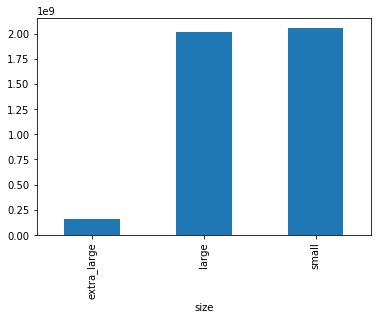

In [44]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

### Changes in sales over time
Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing change in a number over time, since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.

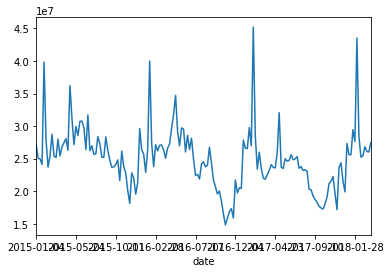

In [45]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(x="date", y="nb_sold", kind="line")

# Show the plot
plt.show()

### Avocado supply and demand
Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.

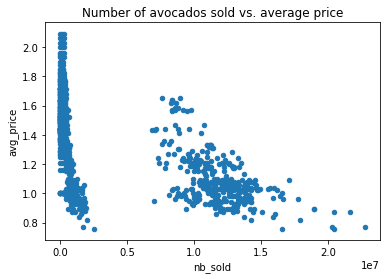

In [46]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x = "nb_sold", y = "avg_price", 
              kind="scatter", 
              title = "Number of avocados sold vs. average price")

# Show the plot
plt.show()

It looks like when more avocados are sold, prices go down. However, this doesn't mean that fewer sales causes higher prices - we can only tell that they're correlated with each other

### Price of conventional vs. organic avocados
Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.

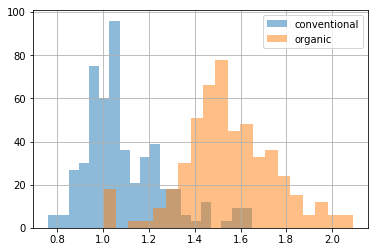

In [47]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, 
                                                               bins=20)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, 
                                                          bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

### Finding missing values

In [48]:
# Check individual values for missing values
print(avocados.isna().head())

    date   type   year  avg_price   size  nb_sold
0  False  False  False      False  False    False
1  False  False  False      False  False    False
2  False  False  False      False  False    False
3  False  False  False      False  False    False
4  False  False  False      False  False    False


In [50]:
# Check each column for missing values
print(avocados.isna().any())


date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


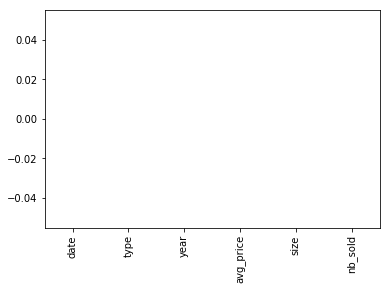

In [51]:
# Bar plot of missing values by variable
avocados.isna().sum().plot(kind="bar")

# Show plot
plt.show()

### Removing Missing Values

*DROPNA()*

In [52]:
# Remove rows with missing values
avocados_complete = avocados.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


### Replacing missing values

In [ ]:
# From previous step
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
avocados_2016[cols_with_missing].hist()
plt.show()

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

### List of dictionaries

In [53]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348}
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  large_sold  small_sold
0  2019-11-03     7835071    10376832
1  2019-11-10     8561348    10717154


### Dictionary of lists

In [54]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


### CSV to DataFrame

In [ ]:
airline_bumping = pd.read_csv("airline_bumping.csv")
print(airline_bumping.head())
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals)

In [55]:
### DataFrame to CSV

In [ ]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values("bumps_per_10k", 
                                                   ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("airline_totals_sorted.csv")
